In [969]:
import matplotlib.pyplot as plt
import numpy as np

In [970]:
def g_data(mean,cov,label):
    x,y,z = np.random.multivariate_normal(mean, cov, 25).T
    label=label
    bias=-1
    data={'x':x,'y':y,'z':z,'bias':bias,'label':label}
    return data

In [1019]:

m1=[0,0,0]
cov1=[[1,0,0],[0,1,0],[0,0,1]]
m2=[4,4,4]

X1=pd.DataFrame(data=g_data(m1,cov1,-1))
X2=pd.DataFrame(data=g_data(m2,cov1,1))
X_app=X1.append(X2,ignore_index=True)


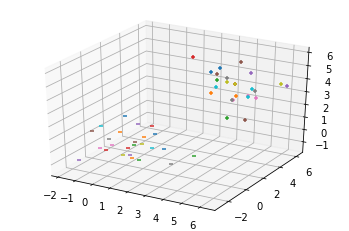

In [1036]:
sX=np.array(X_app)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for d1, sample in enumerate(sX):
    # Plot the negative samples
    if sample[4] == -1 :
        ax.scatter(sample[0], sample[1],sample[2], marker='_')
    # Plot the positive samples
    else:
         ax.scatter(sample[0], sample[1],sample[2], marker='+')


In [1037]:
#Compute Beta square
xmax=[]
mX=X_app.iloc[:,0:3]
mX1=np.array(mX)
for i, x in enumerate(mX1):
    xmax.append(np.linalg.norm(x))
y=max(xmax)
Bsqr=y*y

In [1038]:
def perceptron_btch(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    s=0
    k=0
    u=0
    total_error=0
    while True:
        for i, x in enumerate(X):
            if(k<X.shape[0]):
                if (np.dot(X[i], w)*Y[i]) <= 0:
                    total_error += 1
                    s=s+X[i]*Y[i]
                    w = w + eta*s
                k+=1
        if(total_error==0 or u>100):
            break
        else:
              u=u+1  
    return w
                    


In [1039]:
def perceptron_sgd(X, Y,w0):
    w = w0
    eta = 1
    epochs = 100

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]
    return w

In [1040]:
def hyperplane(w0,w1,w2,w3):
    w0,w1,w2,w3 = w0,w1,w2,w3

    x = np.linspace(-1,1,10)
    y = np.linspace(-1,1,10)
    X,Y = np.meshgrid(x,y)
    fig = plt.figure()
    ax=fig.gca(projection='3d')
    Z = (w3 - w0*X - w1*Y) / w2
    surf=ax.plot_surface(X, Y, Z,rstride=1, cstride=1,)


    for d1, sample in enumerate(sX):
        # Plot the negative samples
        if sample[4] == -1 :
            ax.scatter(sample[0], sample[1],sample[2], marker='_')
        # Plot the positive samples
        else:
             ax.scatter(sample[0], sample[1],sample[2], marker='+')


In [1041]:
X=np.array(X_app.iloc[:,0:4])
y=np.array(X_app.iloc[:,4])

In [1042]:
w2=perceptron_btch(X,y)

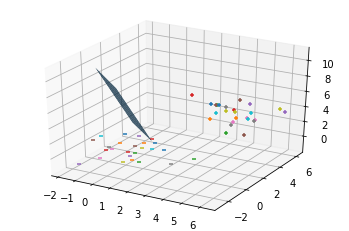

In [1043]:
hyperplane(w2[0],w2[1],w2[2],w2[3])

In [1028]:
from random import gauss
import math

epochs=100
epoch=0
u=0
w0=[]
#for i in range(4):
    #v.append(gauss(0,1,3))
    #v.append(np.random.normal(mu, sigma, (10,10,10)))

v=np.random.randn(3,1)
v/=np.linalg.norm(v,axis=0)
v=np.array([v[0][0] , v[1][0] , v[1][0], 1])
w0=v*0.1


In [1029]:
w=perceptron_sgd(X,y,w0)

In [1030]:
w

array([0.78089716, 0.88959633, 1.29279691, 4.1       ])

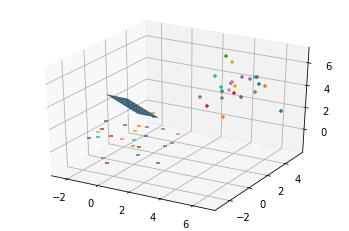

In [1031]:
hyperplane(w[0],w[1],w[2],w[3])

In [830]:
#Compute Gamma Value
xmin=[]
mX=X_app.iloc[:,0:4]
mX1=np.array(mX)
for i, x in enumerate(mX1):
    xmin.append(np.linalg.norm(w.T*mX1[i]))

gamma=min(xmin)
gamma

7.540152986513245

In [831]:
Aph=Bsqr/gamma

In [832]:
K=w0- Aph*w

In [833]:
K0=np.linalg.norm(K)/Bsqr

In [834]:
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

array([ 0.73496457, -0.15751111,  0.7129502 ,  3.        ])

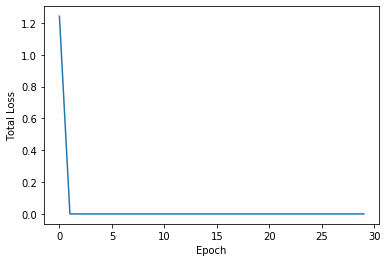

In [835]:
perceptron_sgd_plot(X,y)

In [836]:
Aph

9.838759504830893

In [837]:
gamma

7.540152986513245

In [838]:
K0

1.0625806766015538